## Homework 2

- Build and train a MLP Model to classify Mnist dataset

 1- MLP Network accepts 1D data. So we should flatten our 2D image, then print the dimension of the result arrays.
 
 2- Normalize data by rescaling them to (0,1) 
 
 3- Convert label arrays to 1-hot representation (`keras.utils.to_categorical`)
 
 4- Define Model
    * Hidden Layer 1: Fully Conncted + Relu Activition (e.g. 512 Nuerons)
    * Hidden Layer 2: Fully Connected + Relu Activition (e.g. 512 Neurons)
    * Outout Layer: Fully Connected + Softmax Activition
 
 
- Build and train a CNN+MLP deep learning model with Keras with followings specs for MNIST dataset:

    1. Conv2D(32, kernel_size=(3, 3), activation='relu')
    2. Conv2D(64, kernel_size=(3, 3), activation='relu')
    3. MaxPooling2D(pool_size=(2, 2))
    4. Dense(128, activation='relu')
    5. Dense(num_classes, activation='softmax')

    Also build another model with BatchNormalization and Dropout.
    Compare these two CNN + MLP models performance for test data

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


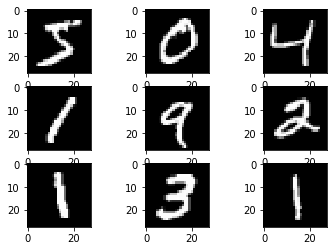

(60000, 28, 28, 1)


In [63]:
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import LSTM
import keras
from keras.layers import Conv2D, MaxPooling2D


(x_train, y_train), (x_test, y_test) = mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

# flatten data
# x_train = np.reshape(x_train, [-1, 28*28])
# x_test = np.reshape(x_test, [-1, 28*28])
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
                      
# normalize data by scaling them (0,1)
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_test)

# convert to one-hot vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape)
nb_units = 50


## Train a CNN+MLP model without BatchNormalization and Dropout


In [64]:
import tensorflow as tf
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dense_52 (Dense)             (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
___________________________________________

In [65]:
history = model.fit(x_train,
                    y_train,
                    epochs=3,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    verbose=1,
                    validation_split=0.2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 205s 3ms/step - loss: 0.3606 - accuracy: 0.8920 - val_loss: 0.1303 - val_accuracy: 0.9625
Epoch 2/3
60000/60000 [==============================] - 207s 3ms/step - loss: 0.1036 - accuracy: 0.9683 - val_loss: 0.0708 - val_accuracy: 0.9784
Epoch 3/3
60000/60000 [==============================] - 205s 3ms/step - loss: 0.0613 - accuracy: 0.9815 - val_loss: 0.0572 - val_accuracy: 0.9817


In [66]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], acc*100))


accuracy: 98.17%


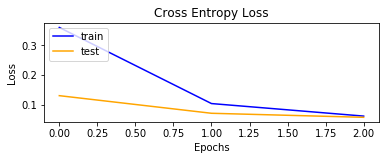

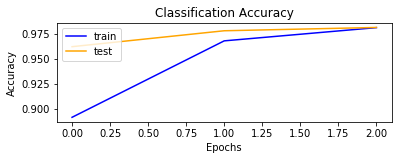

In [69]:
# plot diagnostic learning curves
# plot loss
pyplot.subplot(2, 1, 1)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.ylabel('Loss')
pyplot.xlabel('Epochs')
pyplot.show()

# plot accuracy
pyplot.subplot(2, 1, 2)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.show()


## Train a CNN+MLP model with BatchNormalization and Dropout

In [70]:
from keras.layers import BatchNormalization

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))
model2.add(Dense(num_classes, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()


Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_11 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_53 (Dense)             (None, 128)               692352    
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)             

In [71]:
history2 = model2.fit(x_train,
                    y_train,
                    epochs=3,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    verbose=1,
                    validation_split=0.2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 137s 2ms/step - loss: 0.1850 - accuracy: 0.9451 - val_loss: 0.6490 - val_accuracy: 0.8369
Epoch 2/3
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0720 - accuracy: 0.9787 - val_loss: 0.1264 - val_accuracy: 0.9607
Epoch 3/3
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0545 - accuracy: 0.9836 - val_loss: 0.0562 - val_accuracy: 0.9830


In [79]:
_, accuracy = model2.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model2.metrics_names[1], accuracy*100))


accuracy: 98.30%


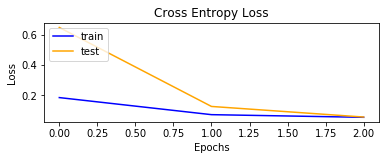

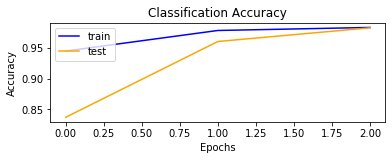

In [80]:
# plot loss
pyplot.subplot(2, 1, 1)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history2.history['loss'], color='blue', label='train')
pyplot.plot(history2.history['val_loss'], color='orange', label='test')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.ylabel('Loss')
pyplot.xlabel('Epochs')
pyplot.show()

# plot accuracy
pyplot.subplot(2, 1, 2)
pyplot.title('Classification Accuracy')
pyplot.plot(history2.history['accuracy'], color='blue', label='train')
pyplot.plot(history2.history['val_accuracy'], color='orange', label='test')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epochs')
pyplot.show()


### Conclusion:
The accuracies and plots suggest that batch normalization and dropout that are implemented in this case do not offer any benefit.